# Customer Segementation

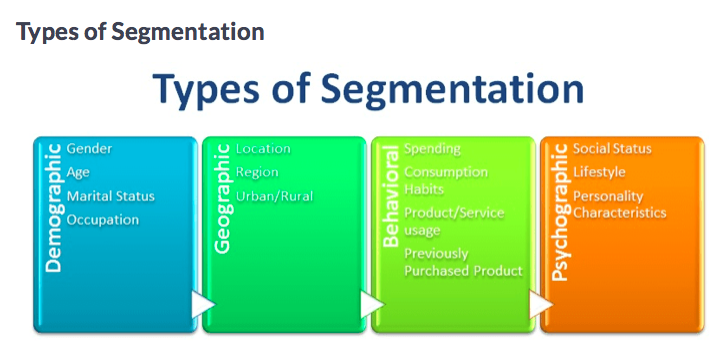

In [22]:
from IPython.display import Image
Image(filename='customersegmentationtypesegmentation.png')

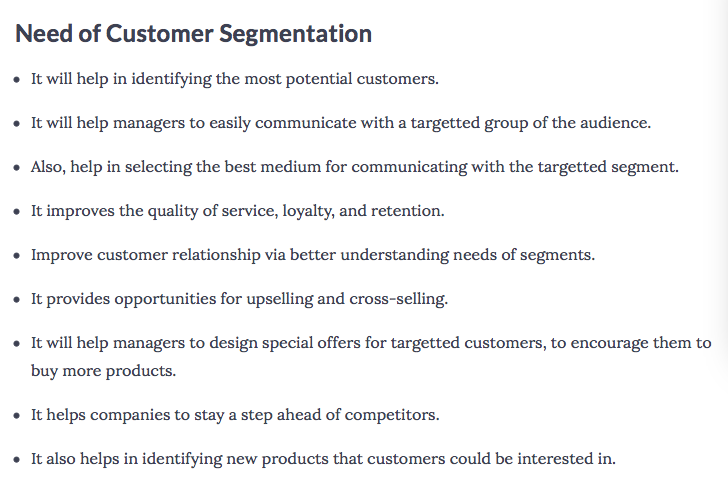

In [23]:
Image(filename='needsegmentation.png')

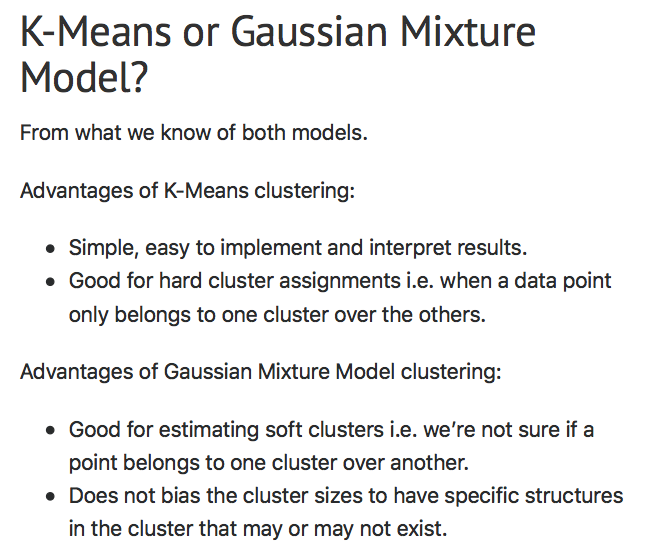

In [24]:
Image(filename='kmeangausian.png')

In [1]:
# plotting modules
#import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import r2_score

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
#import pandas_profiling
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, RidgeCV, Ridge
from sklearn import metrics
from sklearn.model_selection import train_test_split
import scipy.stats
from sklearn.linear_model import SGDRegressor, SGDClassifier,LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
#from xgboost import XGBClassifier

sns.set_style('whitegrid')

%matplotlib inline
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error
#https://www.kaggle.com/ksjpswaroop/yelp-data-analysis
#https://www.kaggle.com/ksjpswaroop/yelp-data-analysis
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import TruncatedSVD
#import graphlab
#import turicreate
#from surprise import SVD
#from surprise import Dataset
#from surprise.model_selection import cross_validate
#import Recommenders as Recommenders
import lifetimes

## 1. Customer Segmentation Past purchases

## RFM matrix principle is the best. 

RFM stands for Recency, Frequency and Monetary. It is a customer segmentation technique that uses past purchase behavior to divide customers into groups.

RFM Score Calculations

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent

Step to do it:
   
    Step 1: Calculate the RFM metrics for each customer.
    Step 2: Add segment numbers to RFM table.
    Step 3: Sort according to the RFM scores from the best 
            customers (score 111).

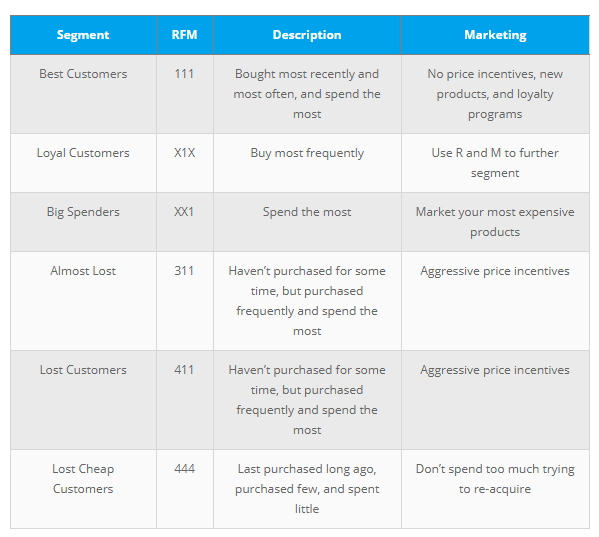

In [26]:
from IPython.display import Image
Image(filename='customersegmentation.png')

## Looking at the Data

In [33]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df1 = pd.read_excel("OnlineRetail.xlsx")
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Indonesia
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Indonesia
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Indonesia
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Indonesia
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,Indonesia


In [34]:
display(df1.Country.nunique())
display(df1.Country.unique())
display(df1.Country.isnull().sum(axis=0))

24

array(['Indonesia', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain'], dtype=object)

0

In [35]:
customer_country=df1[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
12,Indonesia,1087
10,Germany,31
9,France,30
21,Spain,8
0,Australia,8
20,Portugal,7
3,Belgium,5
14,Italy,4
15,Japan,3
23,Switzerland,3


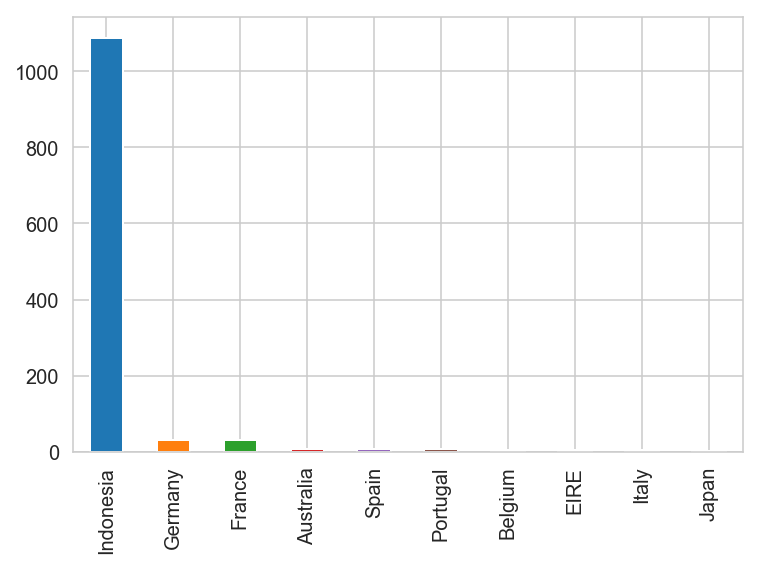

In [36]:
#Top ten country's customer
customer_country.Country.value_counts()[:10].plot(kind='bar')

## Data Cleaning

In [37]:
#df1 = df1.loc[df1['Country'] == 'United Kingdom']

In [38]:
df1.isnull().sum(axis=0)

InvoiceNo          0
StockCode          0
Description      166
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     25315
Country            0
dtype: int64

In [39]:
#There are 133600 missing values in CustomerID column, since our analysis is based on customers, we will remove these missing values.
df1 = df1[pd.notnull(df1['CustomerID'])]
df1.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [40]:
#Check the min and max values in Unit price ,Quantity column
print ('min unit price',df1.UnitPrice.min())
print ('Quantity',df1.Quantity.min())

min unit price 0.0
Quantity -74215


In [41]:
#Remove the negative values in Quantity column.
df1 = df1[(df1['Quantity']>0)]
df1.Quantity.min()

1

In [42]:
print ('After cleaning up, we now dealing with' ,df1.shape[0], 'rows and',df1.shape[1], 'row')
print(' ')
df1.info()

After cleaning up, we now dealing with 39190 rows and 8 row
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39190 entries, 0 to 65082
Data columns (total 8 columns):
InvoiceNo      39190 non-null object
StockCode      39190 non-null object
Description    39190 non-null object
Quantity       39190 non-null int64
InvoiceDate    39190 non-null object
UnitPrice      39190 non-null float64
CustomerID     39190 non-null float64
Country        39190 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 2.7+ MB


In [43]:
print("Check unique value for each column")
def unique_counts(df1):
    for i in df1.columns:
        count = df1[i].nunique()
        print(i, ": ", count)
unique_counts(df1)

Check unique value for each column
InvoiceNo :  2001
StockCode :  2570
Description :  2583
Quantity :  127
InvoiceDate :  1867
UnitPrice :  160
CustomerID :  1139
Country :  22


## RFM Customer Segmentation

In [44]:
# add new
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,Indonesia,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,Indonesia,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,Indonesia,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,Indonesia,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,Indonesia,20.34


In [47]:
#find first or last data
display(df1['InvoiceDate'].min())
display(df1['InvoiceDate'].max())

Timestamp('2010-12-01 08:26:00')

Timestamp('2011-01-20 16:17:00')

In [46]:
#Since recency is calculated for a point in time, and the last invoice date is 1/10/2011, we will use 1/09/2011 to calculate recency.
#change format
import datetime as dt
NOW = dt.datetime(2011,12,10)
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

In [21]:
#Create a RFM table
rfmTable = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, # Recency
                                        'InvoiceNo': lambda x: len(x),      # Frequency
                                        'TotalPrice': lambda x: x.sum()}) # Monetary Value
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalPrice': 'monetary_value'}, inplace=True)


In [53]:
print(rfmTable.head(4))
#print(rfmTable.sort_values('recency',ascending= False).tail(4))

            recency  frequency  monetary_value
CustomerID                                    
12346.0         325          1        77183.60
12347.0         367         31          711.79
12348.0         358         17          892.80
12356.0         325         36         2271.62


CustomerID 12346 has frequency:1, monetary value:$77183.60 and recency:324 days.

CustomerID 12348.0 has frequency: 17, monetary value: $892.80 and recency: 358 day

## Let's check the details of the first customer
RFM Table Correctness verification

In [54]:
first_customer = df1[df1['CustomerID']== 12346.0]
first_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,Indonesia,77183.6


In [55]:
#The first customer has shopped only once, bought one item at a huge quantity(74215). The unit price is very low, seems a clearance sale.
(NOW - dt.datetime(2011,1,18)).days==326

True

In [68]:
second_customer = df1[df1['CustomerID']== 12348.0]
second_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
34083,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,12348.0,Finland,39.60
34084,539318,22951,60 CAKE CASES DOLLY GIRL DESIGN,72,2010-12-16 19:09:00,0.55,12348.0,Finland,39.60
34085,539318,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,13.20
34086,539318,84991,60 TEATIME FAIRY CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,50.40
34087,539318,21213,PACK OF 72 SKULL CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,13.20
34088,539318,21213,PACK OF 72 SKULL CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,50.40
34089,539318,22616,PACK OF 12 LONDON TISSUES,72,2010-12-16 19:09:00,0.29,12348.0,Finland,20.88
34090,539318,21981,PACK OF 12 WOODLAND TISSUES,144,2010-12-16 19:09:00,0.29,12348.0,Finland,41.76
34091,539318,21982,PACK OF 12 SUKI TISSUES,144,2010-12-16 19:09:00,0.29,12348.0,Finland,41.76
34092,539318,21725,SWEETIES STICKERS,48,2010-12-16 19:09:00,0.85,12348.0,Finland,40.80


In [70]:
(NOW - dt.datetime(2010,12,16)).days==359

True

## The easies way to split metrics into segments is by using quartile
    1 This gives us a starting point for detailed analysis
    2 4 segments are easy to understand and explain
    
    -For Recency, Calculate the number of days between present 
     date and date of last purchase each customer.
    -For Frequency, Calculate the number of orders for each 
     customer.
    -For Monetary, Calculate sum of purchase price for each  
     customer.

## Quantiles

In [71]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,332.0,10.0,206.675
0.50,357.0,20.0,354.230
0.75,365.0,43.0,705.455


In [72]:
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 332.0, 0.5: 357.0, 0.75: 365.0},
 'frequency': {0.25: 10.0, 0.5: 20.0, 0.75: 43.0},
 'monetary_value': {0.25: 206.675,
  0.5: 354.22999999999996,
  0.75: 705.4549999999999}}

In [73]:
segmented_rfm = rfmTable

In [75]:
#Lowest recency, highest frequency and monetary are our best customers
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [76]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))

#alternative
#https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python

In [77]:
#Add segment numbers to the RFM table
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,4,1
12347.0,367,31,711.79,4,2,1
12348.0,358,17,892.80,3,3,1
12356.0,325,36,2271.62,1,2,1
12359.0,331,16,547.50,1,3,2


RFM segments split your customer base into an imaginary 3D cube. It is hard to visualize. However, we can sort it out.
Add a new column to combine RFM score, 111 is the highest score as we determined earlier.

In [78]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) \
                            + segmented_rfm.f_quartile.map(str) \
                            + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,4,1,141
12347.0,367,31,711.79,4,2,1,421
12348.0,358,17,892.80,3,3,1,331
12356.0,325,36,2271.62,1,2,1,121
12359.0,331,16,547.50,1,3,2,132


Apparently, the first customer is not our best customer at all.
Here is top 10 of our best customers!

In [79]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
14646.0,323,184,27008.26,1,1,1,111
15061.0,325,162,22107.61,1,1,1,111
17450.0,332,74,20649.04,1,1,1,111
14156.0,329,44,17096.92,1,1,1,111
14911.0,323,336,11218.36,1,1,1,111
13089.0,326,257,9650.39,1,1,1,111
13798.0,332,60,6571.02,1,1,1,111
15311.0,324,400,6128.10,1,1,1,111
13093.0,330,110,6068.47,1,1,1,111


In [80]:
print('Best Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='111']))
print('loyal Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='X1X']))
print('Big Spender: ',len(segmented_rfm[segmented_rfm['RFMScore']=='XX1']))
print('Almost Lost: ',len(segmented_rfm[segmented_rfm['RFMScore']=='311']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='411']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFMScore']=='444']))

Best Customers:  71
loyal Customers:  0
Big Spender:  0
Almost Lost:  18
Lost Customers:  9
Lost Cheap Customers:  57


In [81]:
#plot
#https://github.com/jwjhuang/customer_segmentation/blob/master/Member%20cluster%20method_RFM.ipynb

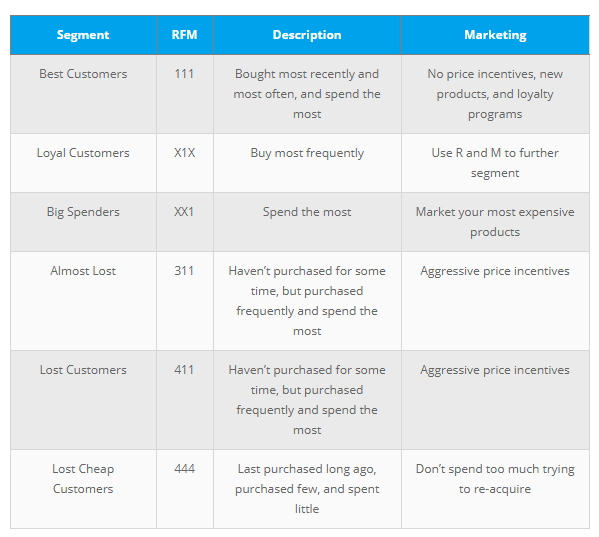

In [82]:
from IPython.display import Image
Image(filename='customersegmentation.png')

## 2 Customer segmentation with demographic characteristics (KNN)
Typical information include:
    - CustomerID
    - Gender
    - Age
    - Annual Income (k$)
    - Spending Score (1-100)

## Loading Data

In [83]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [55]:
df=dataset.iloc[:,3:5]
df.head(2)
X=df.values

#extra
df_y=dataset.iloc[:,1]
y=df_y

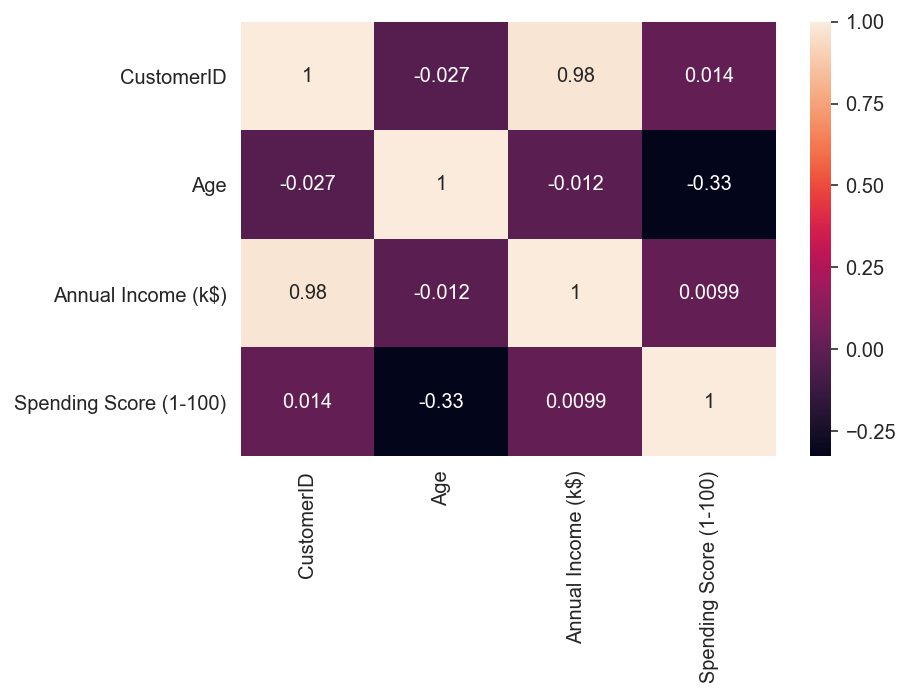

In [56]:
corr = dataset.corr()
sns.heatmap(corr, annot=True)

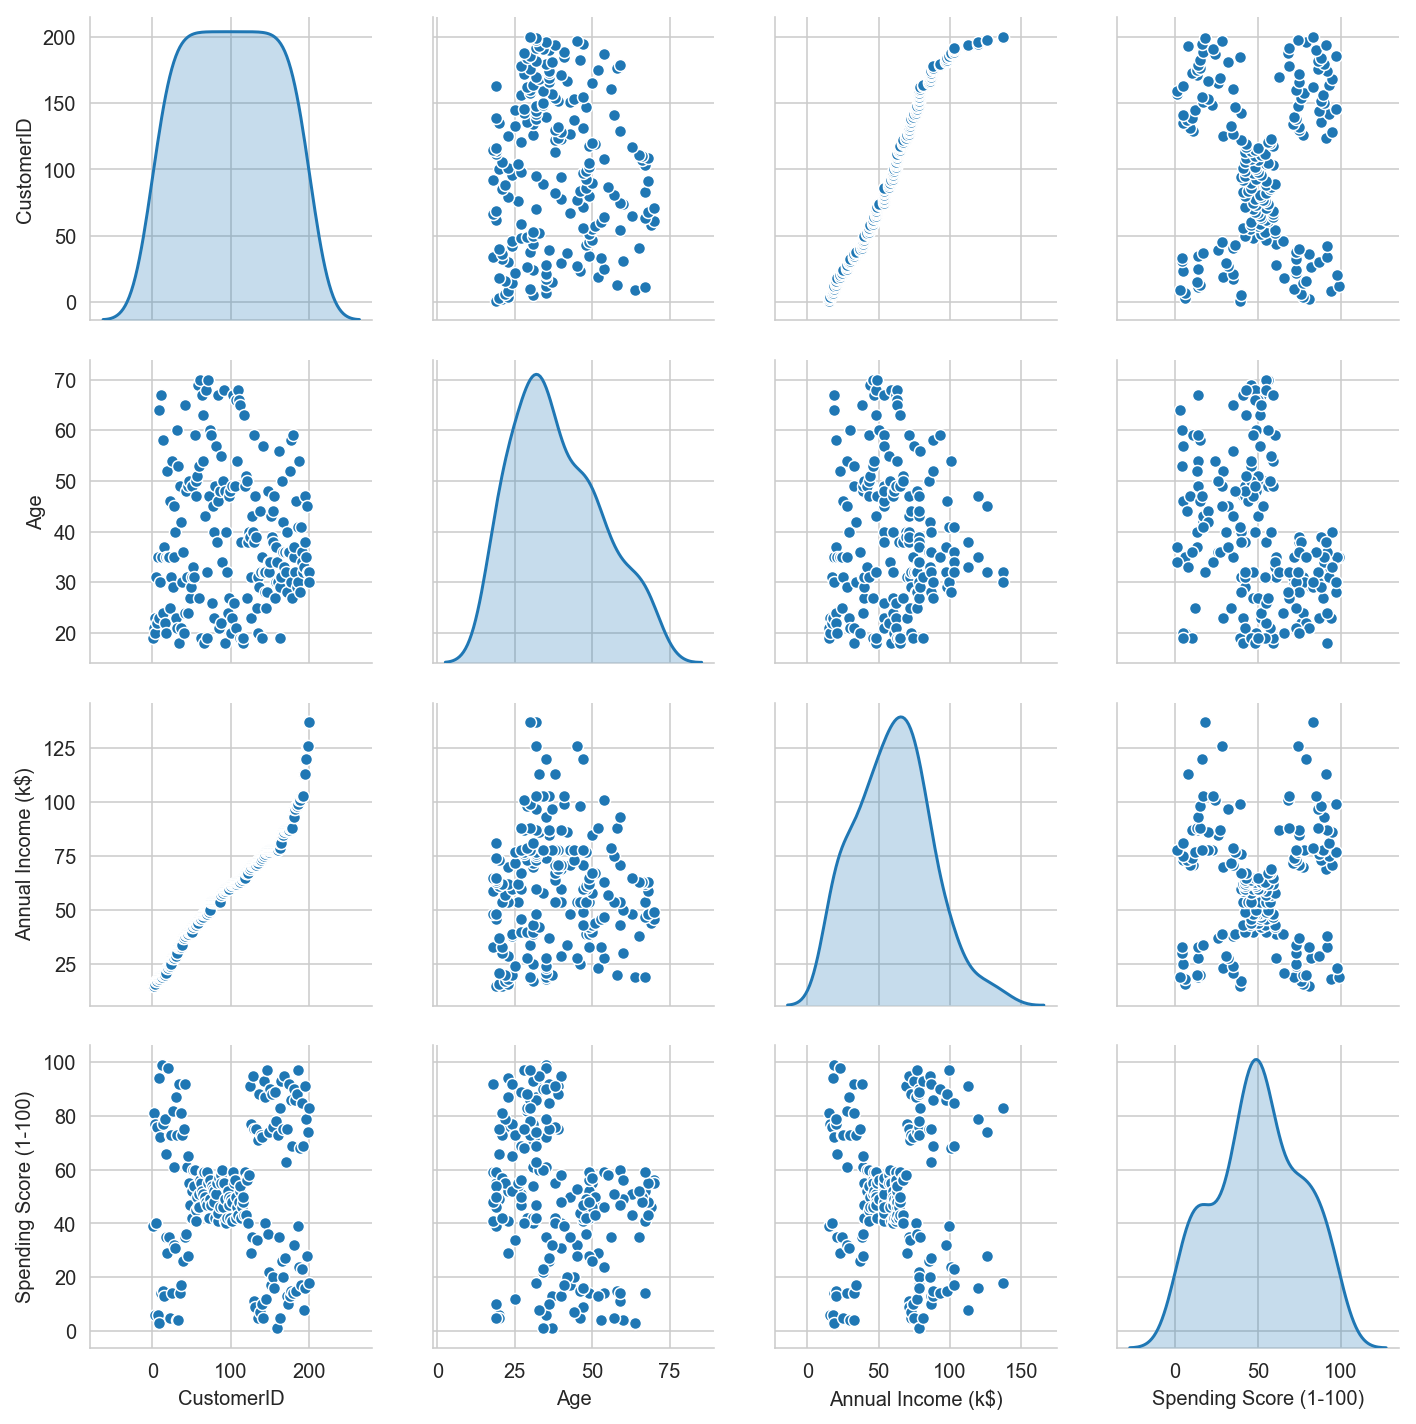

In [57]:
sns.pairplot(dataset, diag_kind = 'kde')

In [58]:
df=dataset.iloc[:,3:5]
df.head(2)

#Features Matrix
X=df.values

# standardize the predictors
#ss = StandardScaler()
#Xs = ss.fit_transform(X)

## Cluster Analysis

First Step is to find the Number of Cluster

Finding optimal number of cluster using dendrogram

From the above graph we can see that optimal number of custer will be 5


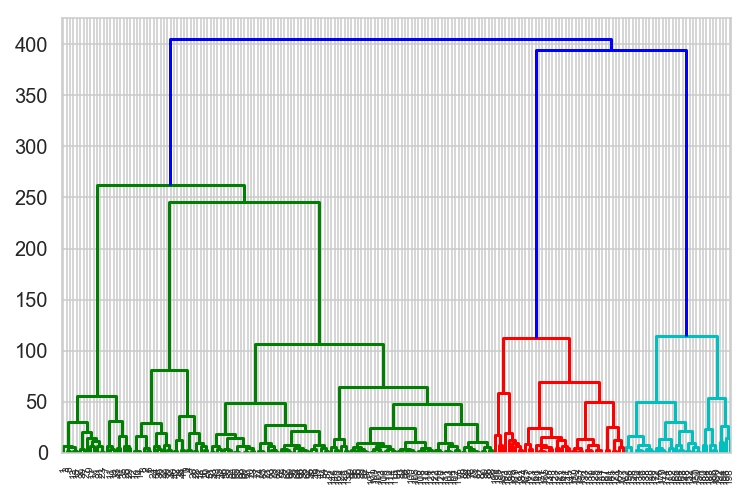

In [59]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))
print('From the above graph we can see that optimal number of custer will be 5')

#### Finding the optimal number of cluster using Elbow method

From elbow method also, the optimal number of cluster will be 5


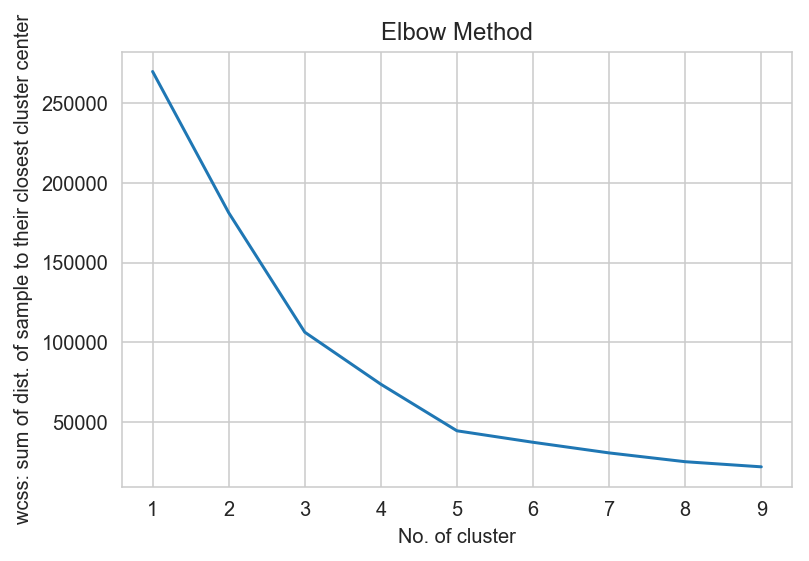

In [60]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )
print('From elbow method also, the optimal number of cluster will be 5')

#### KMeans Clustering Model with 5 cluster

In [61]:
kmeans_1=KMeans(n_clusters=5)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

df['cluster']=cluster_pred
df.cluster.value_counts()

0    81
2    39
3    35
4    23
1    22
Name: cluster, dtype: int64

## Intertia investigate

 inertia of the clustering (i.e. the sum of squared distances to the nearest cluster center).


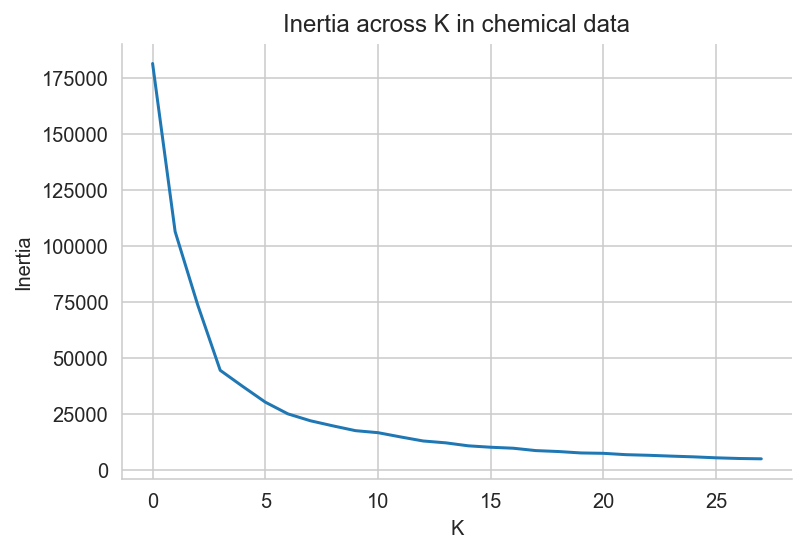

In [62]:
# As you can see, sometimes there is not a well-defined elbow!
inertias = []
for n_clusters in range(2,30):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertias.append(inertia.mean())

plt.plot(inertias)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.title("Inertia across K in chemical data")
sns.despine()
print(' inertia of the clustering (i.e. the sum of squared distances to the nearest cluster center).')

If we were to make some basic assumptions about cluster quality, they would be:
    - High intra-class similarity (within clusters)
    - Low inter-class similarity (between clusters)

## investigate the clustering

In [63]:
#investigation 
df['is_1'] = df.cluster==0
df.groupby("is_1")['Spending Score (1-100)'].value_counts()

df['is_2'] = df.cluster==1
df.groupby("is_2")['Spending Score (1-100)'].value_counts()

df['is_3'] = df.cluster==2
df.groupby("is_3")['Spending Score (1-100)'].value_counts()

df['is_4'] = df.cluster==3
df.groupby("is_4")['Spending Score (1-100)'].value_counts()

df['is_5'] = df.cluster==4
df.groupby("is_5")['Spending Score (1-100)'].value_counts();

In [64]:
cluster= df[['is_1','is_2','is_3','is_4', 'is_5']]

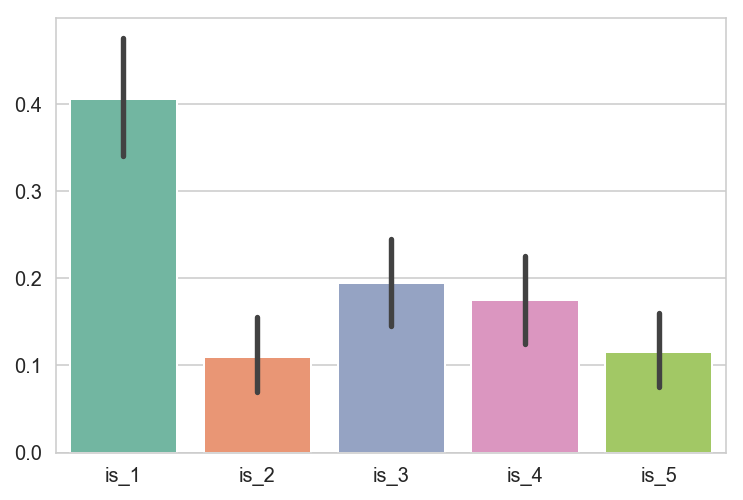

In [65]:
sns.barplot(data=cluster, palette="Set2")

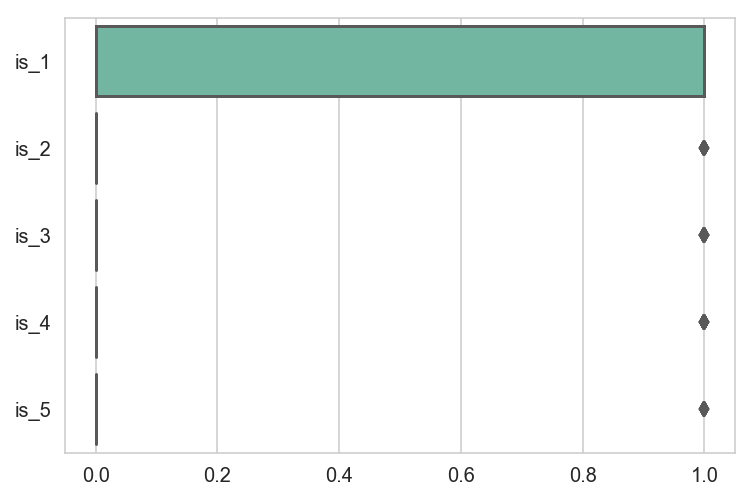

In [66]:
#plt.figure(figsize = (20,8))
sns.boxplot(data=cluster, orient='h', palette="Set2")

In [67]:
display ('cluster 1',df.groupby("is_1")[['Annual Income (k$)', 'Spending Score (1-100)']].mean())
display ('cluster 2 ',df.groupby("is_2")[['Annual Income (k$)', 'Spending Score (1-100)']].mean())
display ('cluster 3 ',df.groupby("is_3")[['Annual Income (k$)', 'Spending Score (1-100)']].mean())
display ('cluster 4 ',df.groupby("is_4")[['Annual Income (k$)', 'Spending Score (1-100)']].mean())
display ('cluster 5 ',df.groupby("is_5")[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

'cluster 1'

,Annual Income (k$),Spending Score (1-100)
is_1,,
False,64.142857,50.663866
True,55.296296,49.518519


'cluster 2 '

,Annual Income (k$),Spending Score (1-100)
is_2,,
False,64.865169,46.595506
True,25.727273,79.363636


'cluster 3 '

,Annual Income (k$),Spending Score (1-100)
is_3,,
False,54.267081,42.465839
True,86.538462,82.128205


'cluster 4 '

,Annual Income (k$),Spending Score (1-100)
is_4,,
False,54.69697,57.218182
True,88.20000,17.114286


'cluster 5 '

,Annual Income (k$),Spending Score (1-100)
is_5,,
False,65.011299,54.005650
True,26.304348,20.913043


## Visualization

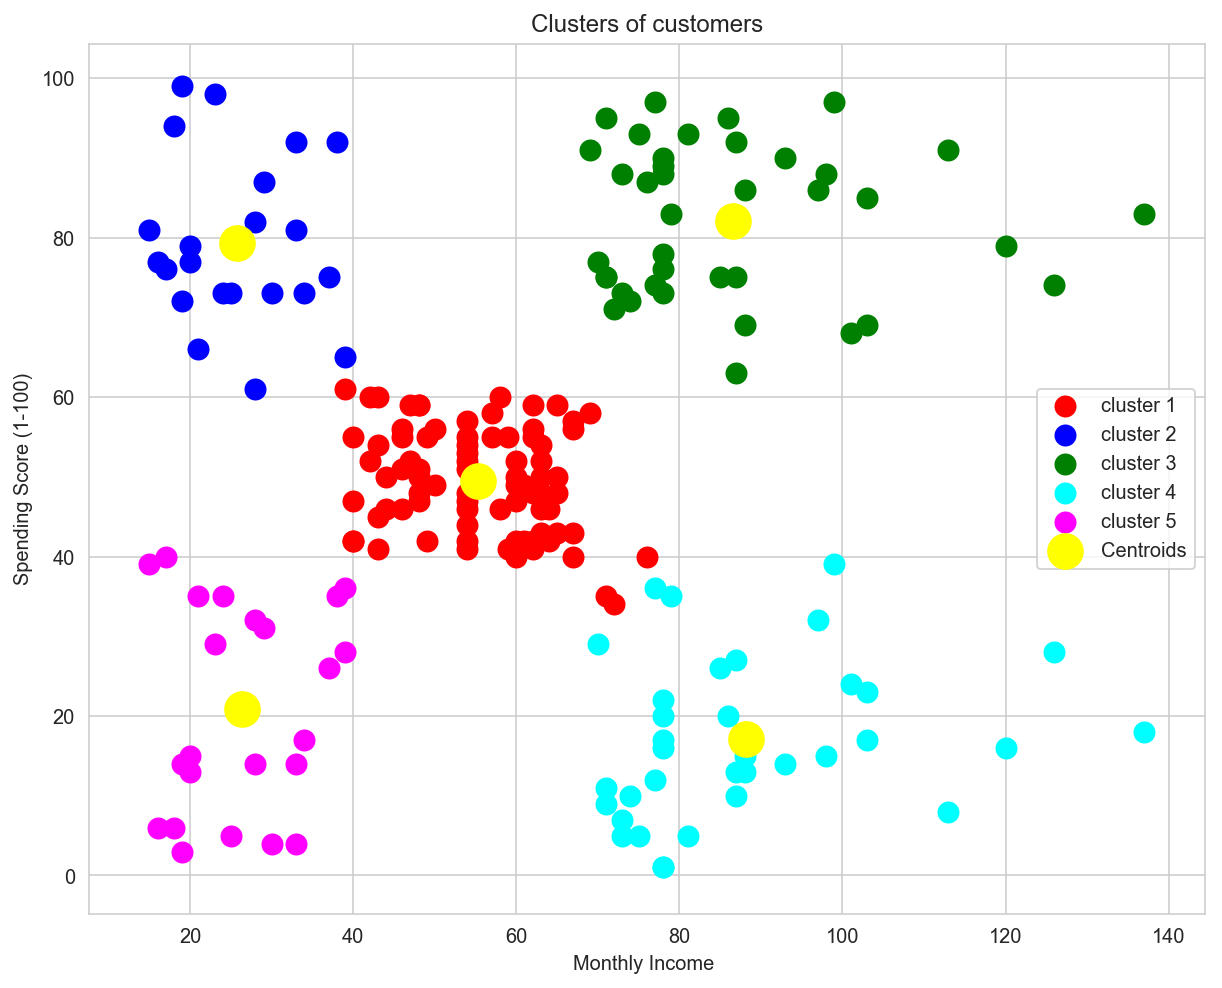

In [68]:
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0,0],X[cluster_pred==0,1], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_pred==1,0],X[cluster_pred==1,1], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_pred==2,0],X[cluster_pred==2,1], s = 100, c = 'green', label ='cluster 3' )
plt.scatter(X[cluster_pred==3,0],X[cluster_pred==3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[cluster_pred==4,0],X[cluster_pred==4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Monthly Income ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()